In [24]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-11-03 09:25:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 64.233.170.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-11-03 09:25:16 (184 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [25]:
import pandas as pd

In [26]:
df = pd.read_json('/tmp/sarcasm.json')

In [27]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [29]:
df.drop(['article_link'], axis = 1, inplace = True)

In [30]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [31]:
sentences = df['headline'].values

In [32]:
labels = df['is_sarcastic'].values

In [33]:
train_sentences = sentences[:20000]
test_sentences = sentences[20000:]

train_labels = labels[:20000]
test_labels = labels[20000:]

In [34]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [36]:
tok = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [37]:
tok.fit_on_texts(train_sentences)
word_idx = tok.word_index

In [38]:
train_seqs = tok.texts_to_sequences(train_sentences)
p_train_seqs = pad_sequences(train_seqs, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [39]:
test_seqs = tok.texts_to_sequences(test_sentences)
p_test_seqs= pad_sequences(test_seqs, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim= vocab_size, output_dim= 16, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                38424     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 198,449
Trainable params: 198,449
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 15
history = model.fit(p_train_seqs, train_labels, epochs=num_epochs, validation_data=(p_test_seqs, test_labels), verbose=2)

Epoch 1/15
625/625 - 3s - loss: 0.4364 - accuracy: 0.7821 - val_loss: 0.3175 - val_accuracy: 0.8642
Epoch 2/15
625/625 - 3s - loss: 0.1923 - accuracy: 0.9266 - val_loss: 0.3213 - val_accuracy: 0.8645
Epoch 3/15
625/625 - 3s - loss: 0.0925 - accuracy: 0.9700 - val_loss: 0.3731 - val_accuracy: 0.8602
Epoch 4/15
625/625 - 3s - loss: 0.0388 - accuracy: 0.9894 - val_loss: 0.4544 - val_accuracy: 0.8578
Epoch 5/15
625/625 - 3s - loss: 0.0150 - accuracy: 0.9973 - val_loss: 0.5319 - val_accuracy: 0.8535
Epoch 6/15
625/625 - 3s - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.5990 - val_accuracy: 0.8533
Epoch 7/15
625/625 - 3s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.6404 - val_accuracy: 0.8520
Epoch 8/15
625/625 - 3s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.6869 - val_accuracy: 0.8521
Epoch 9/15
625/625 - 3s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.7361 - val_accuracy: 0.8454
Epoch 10/15
625/625 - 3s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.7871 - val_accuracy: 0.8451

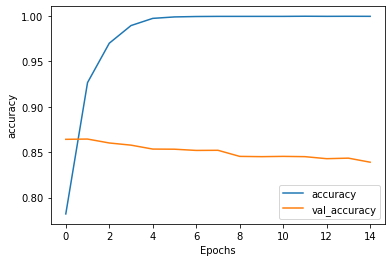

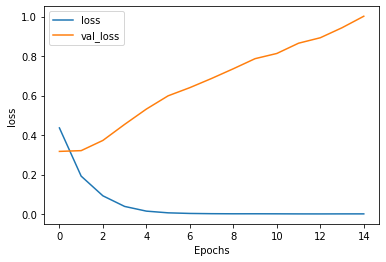

In [44]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [47]:
import numpy as np

In [53]:
sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night"]
sequences = tok.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(np.round(model.predict(padded)))

[[1.]
 [0.]]


In [54]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian
jovian.commit(project= 'nlp-sarcasm-analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/gitrohitjain/nlp-sarcasm-analysis


<IPython.core.display.Javascript object>